In [1]:
import numpy as np
import pandas as pd
import os
import cv2 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from tqdm import tqdm_notebook 

#! kaggle competitions download -c histopathologic-cancer-detection

In [3]:
TRAIN_DATA_DIRECTORY = '/Users/nitinmahajan/histopathologic-cancer-detection_2/train/'
TRAIN_LABEL = '/Users/nitinmahajan/histopathologic-cancer-detection_2/train_labels.csv'
TEST_DATA_DIRECTORY = '/Users/nitinmahajan/histopathologic-cancer-detection_2/test/'

In [4]:
print(
    'Number of images in TRAIIN dataset =',
    len(
        os.listdir(
            '/Users/nitinmahajan/histopathologic-cancer-detection_2/train')))

print(
    'Number of images in TEST dataset =',
    len(os.listdir(
        '/Users/nitinmahajan/histopathologic-cancer-detection_2/test')))

Number of images in TRAIIN dataset = 220025
Number of images in TEST dataset = 57458


In [5]:
#Data set
df = pd.read_csv ('/Users/nitinmahajan/histopathologic-cancer-detection_2/train_labels.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
id       220025 non-null object
label    220025 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


__1. Only two columns present in the data set.__

__2. No missing values__

In [7]:
df['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

__Negative/positive ratio is not entirely 50/50 as there are approx 130k negatives and 90k positives. The ratio is closer to 60/40 meaning that there are 1.5 times more negative images than positives. I wont count this is as unbalanced data though__

In [8]:
 ####Define a fucntion to print the images #################

def print_images(tdd, df, column, n_images):
    unique_categories = (df.groupby([column])[column].unique()).index
    fig, ax = plt.subplots(nrows=len(unique_categories),
                           ncols=n_images,
                           figsize=(2 * n_images,2 * len(unique_categories)))

    for i, category in enumerate(unique_categories):
        im = df[df[column] == category].sample(
            n_images)  # n_images is also the sample size
        for j in range(0, n_images):
            file = tdd + im.iloc[j]['id'] + '.tif'
            img = cv2.imread(file)
            ax[i, j].imshow(img, resample=True, cmap='gray')
            color = ['red' if df.iloc[i].label == 1 else 'blue'][0]
            ax[i, j].set_title(category, fontsize=20, color=color)
    plt.tight_layout()
    plt.show()
    return

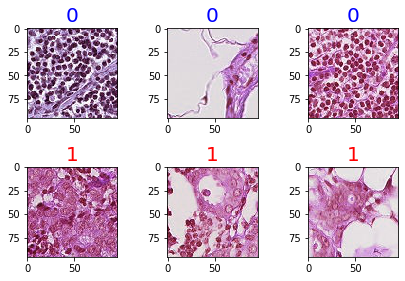

In [9]:
print_images(TRAIN_DATA_DIRECTORY,df,'label',3)

In [10]:
# subsetting 10,000 images with labels 1 and 0
SAMPLE_SIZE = 10000
df_normal = df[df['label'] == 0].sample(SAMPLE_SIZE, random_state = 42)
df_cancer = df[df['label'] == 1].sample(SAMPLE_SIZE, random_state = 42)

# Join the two data frame, so that both cancer and normal got in one data frame, 
## Remember to shuffle the data set , to avaoid biasing
df_subset = pd.concat([df_normal, df_cancer], axis=0).reset_index(drop=True)

#shuffle the dataframe using shuffle 
from sklearn.utils import shuffle
df_subset = shuffle(df_subset)

df_subset.head()

,id,label
17098,3e2cea5dca7061c582718610c360eabc29943502,1
8176,f0c670cabc7fd53c595aae9a7869a027067861fb,0
20,a07cf67092f1b982ab7da7d9544c9b158556cd62,0
13425,e5532d1d2d3de0cd0d44808037bb421da61f3152,1
17346,3049fcf77315dda9fc12661b3378bf3a841fec38,1


In [11]:
df_subset['label'].value_counts()

1    10000
0    10000
Name: label, dtype: int64

In [12]:
####We can now split the dataset in trian and spllit####

### Here we are split the data into TRAIN and VALIDATION ###
from sklearn.model_selection import train_test_split

def split_data(df_train):
        df_train, df_valid = train_test_split(df_train, test_size=0.2, random_state=42,
                                     stratify=df_train['label'])
        
        # We have to set the iindex as 'id', otherwise was giving trouble while uploadiung
        df.set_index('id', inplace=True)
        
        train_list = list(df_train['id'])
        valid_list = list(df_valid['id'])
        
        return df_train, df_valid, train_list, valid_list

In [13]:
#Lets split it now###
df_train, df_valid, train_list, valid_list = split_data(df_subset)

In [14]:
print('df_train_shape', df_train.shape)
print('df_validation_shape', df_valid.shape)

df_train_shape (16000, 2)
df_validation_shape (4000, 2)


In [15]:
##### Copy Data #####

import shutil
def copy_data(lst, source_directory, target_directory):
    for image in lst:
        file_name = image + '.tif' ###Dont forget to add the 'tif'
        target = df.loc[image, 'label']
        if target == 0:
            label = 'normal'
        elif target == 1:
            label = 'cancer'

        image_source = os.path.join(source_directory, file_name)
        image_destination = os.path.join(target_directory, label, file_name)

        # copy the image from source folder to the destination folder
        shutil.copyfile(image_source, image_destination)

    print("Copied data in ", target_directory)

    return

In [16]:
import shutil
copy_data(train_list,TRAIN_DATA_DIRECTORY,'./working_dir/train_dir')
copy_data(valid_list,TRAIN_DATA_DIRECTORY,'./working_dir/validation_dir')

Copied data in  ./working_dir/train_dir
Copied data in  ./working_dir/validation_dir


In [17]:
print('No. of files in working_dir/train_dir/cancer =', \
      len(os.listdir('working_dir/train_dir/cancer')))
print('No. of files in working_dir/train_dir/normal =', \
      len(os.listdir('working_dir/train_dir/normal')))
print('No. of files in working_dir/validation_dir/cancer =', \
      len(os.listdir('working_dir/validation_dir/cancer')))
print('No. of files in working_dir/validation_dir/normal =', \
      len(os.listdir('working_dir/validation_dir/normal')))

No. of files in working_dir/train_dir/cancer = 8000
No. of files in working_dir/train_dir/normal = 8000
No. of files in working_dir/validation_dir/cancer = 2000
No. of files in working_dir/validation_dir/normal = 2000


In [18]:
# put the df_subset to csv file to read later
df_subset.to_csv('df_subset.csv', index=False)

In [19]:
# End of Data Preparation
### ===================================================================================== ###
# Start of Model Building

In [20]:
##Steps of CNN - 
# Import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, Input, Activation, GlobalAveragePooling2D, BatchNormalization, GlobalMaxPooling2D, Concatenate
from keras.models import Sequential, Model, load_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras.optimizers import SGD, Adam
from keras import backend as K 
from keras.utils import plot_model
from keras import layers as KL


Using TensorFlow backend.


In [22]:
def build_model1(height, width, depth):
    kernel_size = (2, 2)
    pool_size = (2, 2)
    first_filters = 32
    second_filters = 32
    third_filters = 64

    dropout_dense = 0.5

    input_shape = (height, width, depth)

    model = Sequential() #Activation Model
    #Filters
    model.add(
        Conv2D(first_filters, kernel_size=kernel_size,
               input_shape=input_shape))
    model.add(Conv2D(first_filters, kernel_size, activation='relu'))
    model.add(Conv2D(first_filters, kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))

    model.add(Conv2D(second_filters, kernel_size, activation='relu'))
    model.add(Conv2D(second_filters, kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))

    model.add(Conv2D(third_filters, kernel_size, activation='relu'))
    model.add(Conv2D(third_filters, kernel_size, activation='relu'))
    #MaxPooling
    model.add(MaxPooling2D(pool_size=pool_size))

# Flattening the Model
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_dense))
    model.add(Dense(2, activation='sigmoid')) #at the end we chnage the activation function
#Summarize the Model
    model.summary()

# Compile the Model
    model.compile(Adam(lr=0.0001, decay=0.00001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [23]:
model1 = build_model1(height=96,width=96,depth=3)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 95, 95, 32)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 32)        4128      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 32)        4128      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 44, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)       

In [24]:
#Model #2
def build_model2(height, width, depth):
    kernel_size = (2, 2)
    pool_size = (2, 2)
    first_filters = 32
    second_filters = 32
    third_filters = 64
    fourth_filters = 128 ######## Different from Model 1

    dropout_dense = 0.5

    input_shape = (height, width, depth)

    model = Sequential()
    model.add(
        Conv2D(first_filters, kernel_size=kernel_size,
               input_shape=input_shape))
    model.add(Conv2D(first_filters, kernel_size, activation='relu'))
    model.add(Conv2D(first_filters, kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    
#Total 3 layers of second filter compared to Model 1
    model.add(Conv2D(second_filters, kernel_size, activation='relu'))
    model.add(Conv2D(second_filters, kernel_size, activation='relu'))
    model.add(Conv2D(second_filters, kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
##Total 3 layers of third filter compared to Model 1
    model.add(Conv2D(third_filters, kernel_size, activation='relu'))
    model.add(Conv2D(third_filters, kernel_size, activation='relu'))
    model.add(Conv2D(third_filters, kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))

    model.add(Conv2D(fourth_filters, kernel_size, activation='relu'))
    model.add(Conv2D(fourth_filters, kernel_size, activation='relu'))
    model.add(Conv2D(fourth_filters, kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=pool_size))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_dense))
    model.add(Dense(2, activation='sigmoid'))

    model.summary()

    model.compile(Adam(lr=0.0001, decay=0.00001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [25]:
model2 = build_model2(height=96,width=96,depth=3)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 95, 95, 32)        416       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 94, 94, 32)        4128      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 93, 93, 32)        4128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 32)        4128      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 44, 44, 32)        4128      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 43, 43, 32)       

In [28]:
import pydotplus
import pydot_ng as pydot

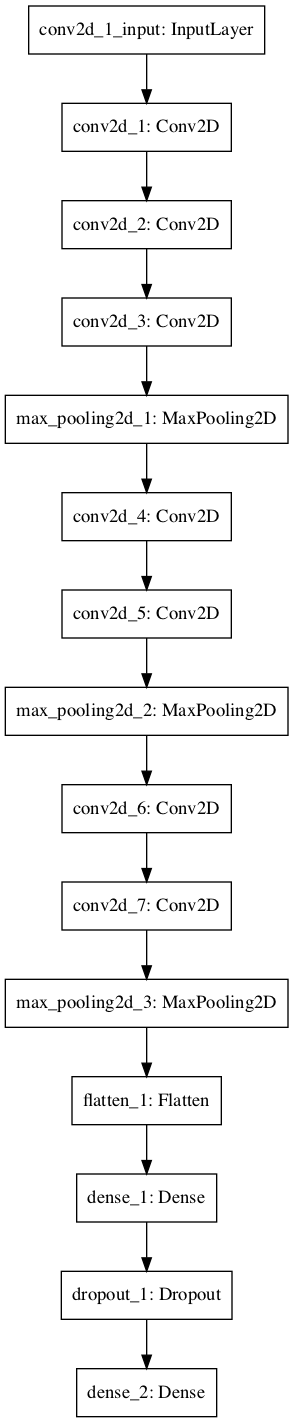

In [29]:
plot_model(model1,to_file='/Users/nitinmahajan/histopathologic-cancer-detection_2/model1.png')

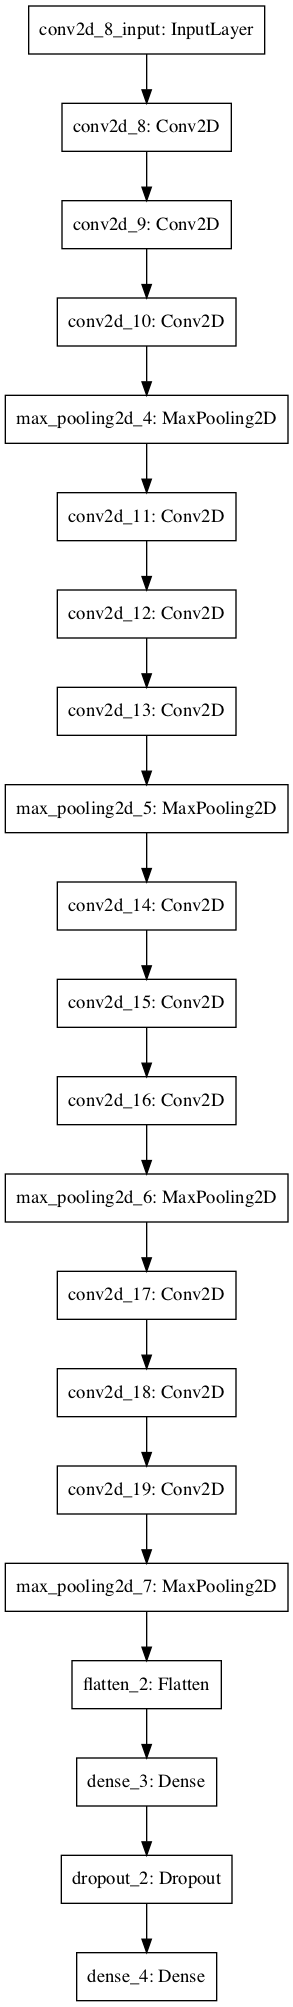

In [30]:
plot_model(model2,to_file='/Users/nitinmahajan/histopathologic-cancer-detection_2/model2.png')

In [32]:
def build_datagen(tp, vp, tstp, imsize, bsize):
    datagen = ImageDataGenerator(rescale=1.0 / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2)

    train_datagen = datagen.flow_from_directory(tp,
                                                target_size=(imsize, imsize),
                                                batch_size=bsize,
                                                class_mode='categorical')

    validation_datagen = datagen.flow_from_directory(vp,
                                                     target_size=(imsize,
                                                                  imsize),
                                                     batch_size=bsize,
                                                     class_mode='categorical')

    #test_datagen = datagen.flow_from_directory(tstp, target_size=(imsize,imsize),
    #                                           batch_size=1, class_mode='binary',
    #                                          shuffle=False)

    test_datagen = datagen.flow_from_directory(vp,
                                               target_size=(imsize, imsize),
                                               batch_size=1,
                                               class_mode='categorical',
                                               shuffle=False)

    return train_datagen, validation_datagen, test_datagen

In [33]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

IMAGE_SIZE = 96
train_path = 'working_dir/train_dir'
validation_path = 'working_dir/validation_dir'
test_path = 'data/test'

num_train_samples = len(df_train)
num_valid_samples = len(df_valid)

batch_size = 10

train_datagen, validation_datagen, test_datagen = build_datagen(train_path,validation_path,
                                                                       test_path, IMAGE_SIZE,batch_size)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [34]:
######## Define Callback function
def callback_list(model):
    checkpoint = ModelCheckpoint(model,
                                 monitor='val_accuracy',
                                 verbose=1,
                                 save_best_only=True,
                                 mode='max')
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                                  factor=0.5,
                                  patience=2,
                                  verbose=1,
                                  mode='max',
                                  min_lr=0.00001)
    callback_list = [checkpoint, reduce_lr]
    return callback_list

In [35]:
model1.fit_generator(
    train_datagen,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=10,
    validation_data=validation_datagen,
    validation_steps=num_valid_samples // batch_size,
    verbose=1,
    callbacks=callback_list(
        '/Users/nitinmahajan/histopathologic-cancer-detection_2/new_model1.h5'))

Epoch 1/10
1600/1600 [==============================] - 167s 104ms/step - loss: 0.5489 - accuracy: 0.7301 - val_loss: 0.6514 - val_accuracy: 0.7700

Epoch 00001: val_accuracy improved from -inf to 0.77000, saving model to /Users/nitinmahajan/histopathologic-cancer-detection_2/new_model1.h5
Epoch 2/10
1600/1600 [==============================] - 167s 104ms/step - loss: 0.4986 - accuracy: 0.7730 - val_loss: 0.2300 - val_accuracy: 0.7954

Epoch 00002: val_accuracy improved from 0.77000 to 0.79537, saving model to /Users/nitinmahajan/histopathologic-cancer-detection_2/new_model1.h5
Epoch 3/10
1600/1600 [==============================] - 169s 106ms/step - loss: 0.4778 - accuracy: 0.7829 - val_loss: 0.6885 - val_accuracy: 0.7996

Epoch 00003: val_accuracy improved from 0.79537 to 0.79962, saving model to /Users/nitinmahajan/histopathologic-cancer-detection_2/new_model1.h5
Epoch 4/10
1600/1600 [==============================] - 166s 104ms/step - loss: 0.4647 - accuracy: 0.7908 - val_loss: 0.4

In [36]:
model2.fit_generator(
    train_datagen,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=10,
    validation_data=validation_datagen,
    validation_steps=num_valid_samples // batch_size,
    verbose=1,
    callbacks=callback_list(
        '/Users/nitinmahajan/histopathologic-cancer-detection_2/new_model2.h5'))

Epoch 1/10
1600/1600 [==============================] - 196s 122ms/step - loss: 0.5607 - accuracy: 0.7099 - val_loss: 0.6334 - val_accuracy: 0.7984

Epoch 00001: val_accuracy improved from -inf to 0.79838, saving model to /Users/nitinmahajan/histopathologic-cancer-detection_2/new_model2.h5
Epoch 2/10
1600/1600 [==============================] - 191s 119ms/step - loss: 0.4859 - accuracy: 0.7828 - val_loss: 0.3700 - val_accuracy: 0.7800

Epoch 00002: val_accuracy did not improve from 0.79838
Epoch 3/10
1600/1600 [==============================] - 191s 120ms/step - loss: 0.4578 - accuracy: 0.7953 - val_loss: 0.5269 - val_accuracy: 0.8125

Epoch 00003: val_accuracy improved from 0.79838 to 0.81250, saving model to /Users/nitinmahajan/histopathologic-cancer-detection_2/new_model2.h5
Epoch 4/10
1600/1600 [==============================] - 206s 129ms/step - loss: 0.4471 - accuracy: 0.7988 - val_loss: 0.2082 - val_accuracy: 0.8249

Epoch 00004: val_accuracy improved from 0.81250 to 0.82487, sa

In [37]:
#MODEL 8

##MobileNet

from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input

def build_model8(height, width, depth):
    input_shape = (height, width, depth)
    MoNet = MobileNet(input_shape=None,
                      alpha=1.0,
                      depth_multiplier=1,
                      dropout=1e-3,
                      include_top=False, ####
                      weights='imagenet',
                      input_tensor=None,
                      pooling=None,
                      classes=1000)
    inputs = Input((height, width, depth))
    x = MoNet(inputs)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    out = Concatenate(axis=-1)([out1, out2, out3])
    out = Dropout(0.5)(out)
    out = Dense(2, activation="sigmoid", name="3_")(out)
    model = Model(inputs, out)

    model.summary()

    model.compile(Adam(lr=0.0001, decay=0.00001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [38]:
model8 = build_model8(height=96,width=96,depth=3)

/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
mobilenet_1.00_224 (Model)      multiple             3228864     input_2[0][0]                    
__________________________________________________________________________________________________
global_max_pooling2d_1 (GlobalM (None, 1024)         0           mobilenet_1.00_224[1][0]         
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 1024)         0           mobilenet_1.00_224[1][0]         
____________________________________________________________________________________________

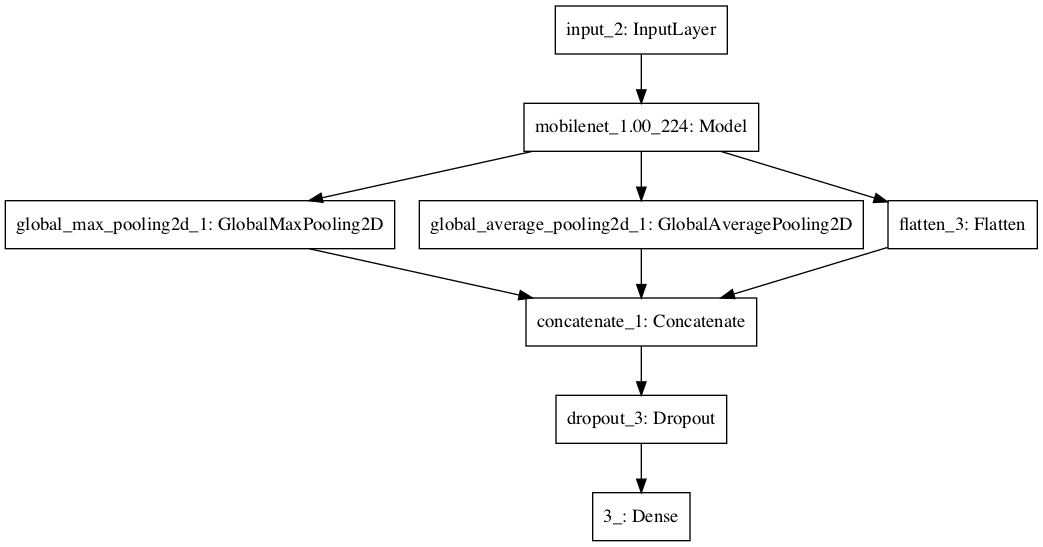

In [39]:
plot_model(model8,to_file='/Users/nitinmahajan/histopathologic-cancer-detection_2/model8.png')

In [40]:
#Fitting and Saving a Trained Model
model8.fit_generator(
    train_datagen,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=10,
    validation_data=validation_datagen,
    validation_steps=num_valid_samples // batch_size,
    verbose=1,
    callbacks=callback_list(
        '/Users/nitinmahajan/histopathologic-cancer-detection_2/new_model8.h5'))

Epoch 1/10
1600/1600 [==============================] - 1047s 655ms/step - loss: 0.8548 - accuracy: 0.7303 - val_loss: 0.3145 - val_accuracy: 0.8280

Epoch 00001: val_accuracy improved from -inf to 0.82800, saving model to /Users/nitinmahajan/histopathologic-cancer-detection_2/new_model8.h5
Epoch 2/10
1600/1600 [==============================] - 1028s 642ms/step - loss: 0.5620 - accuracy: 0.7951 - val_loss: 0.1829 - val_accuracy: 0.8597

Epoch 00002: val_accuracy improved from 0.82800 to 0.85975, saving model to /Users/nitinmahajan/histopathologic-cancer-detection_2/new_model8.h5
Epoch 3/10
1600/1600 [==============================] - 1077s 673ms/step - loss: 0.4450 - accuracy: 0.8263 - val_loss: 0.1147 - val_accuracy: 0.8830

Epoch 00003: val_accuracy improved from 0.85975 to 0.88300, saving model to /Users/nitinmahajan/histopathologic-cancer-detection_2/new_model8.h5
Epoch 4/10
1600/1600 [==============================] - 987s 617ms/step - loss: 0.3788 - accuracy: 0.8497 - val_loss: 